In [25]:
# 导入必要的库
from sklearn.datasets import load_iris  # 用于加载鸢尾花数据集
from sklearn.model_selection import train_test_split  # 用于分割数据集为训练集和测试集
from sklearn.preprocessing import StandardScaler  # 用于特征标准化
from sklearn.neighbors import KNeighborsClassifier  # KNN分类器
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # 模型评估指标
import pandas as pd  # 用于数据处理
import matplotlib.pyplot as plt  # 用于绘图
import seaborn as sns  # 用于高级绘图
import joblib # 用于保存模型    

In [2]:

# 1. 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征矩阵，包含四个特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度
y = iris.target  # 目标向量，包含三个类别标签：0-山鸢尾，1-变色鸢尾，2-维吉尼亚鸢尾

# 特征名称和目标类别名称（便于理解）
feature_names = iris.feature_names
target_names = iris.target_names

# 将数据转换为DataFrame，便于查看和处理
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species'] = df['species'].map({0: target_names[0], 1: target_names[1], 2: target_names[2]})

# 查看前几行数据
print("数据集前5个样本:")
print(df.head())


数据集前5个样本:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [3]:

# 2. 数据预处理

# 分割数据集为训练集和测试集，测试集占30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n训练集样本数量: {len(X_train)}")
print(f"测试集样本数量: {len(X_test)}")



训练集样本数量: 105
测试集样本数量: 45


In [8]:

# 特征标准化（对每个特征进行标准化，使其均值为0，方差为1）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 训练集标准化
X_test_scaled = scaler.transform(X_test)       # 测试集标准化
print("标准化训练集特征", X_train_scaled)
print("标准化测试集特征", X_test_scaled)

标准化训练集特征 [[-0.90045861 -1.22024754 -0.4419858  -0.13661044]
 [ 0.38036614 -1.87955796  0.40282929  0.38029394]
 [-0.90045861  1.63676428 -1.2868009  -1.17041921]
 [ 1.07899781  0.31814344  1.19132338  1.41410271]
 [-0.20182693 -0.56093712  0.17754527  0.12184175]
 [ 0.9625592  -0.12139684  0.79707634  1.41410271]
 [-1.13333583  0.0983733  -1.2868009  -1.4288714 ]
 [-0.90045861  1.63676428 -1.23047989 -1.29964531]
 [-1.7155289  -0.34116698 -1.3431219  -1.29964531]
 [ 1.42831365 -0.12139684  1.19132338  1.15565051]
 [ 0.72968197  0.31814344  0.74075533  1.02642442]
 [-1.13333583 -0.12139684 -1.3431219  -1.29964531]
 [-1.01689722 -0.12139684 -1.23047989 -1.29964531]
 [ 0.14748891 -0.34116698  0.40282929  0.38029394]
 [-0.43470415 -1.44001768  0.00858225 -0.13661044]
 [ 1.54475226  0.31814344  1.24764439  0.76797223]
 [-1.01689722  0.75768372 -1.23047989 -1.04119311]
 [-1.36621306  0.31814344 -1.23047989 -1.29964531]
 [ 0.9625592   0.53791358  1.07868137  1.6725549 ]
 [ 0.0310503   0.31814

In [12]:

# 3. 创建KNN分类器

# n_neighbors=3 表示选择3个最近邻居
# metric='euclidean' 表示使用欧氏距离
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [13]:

# 4. 训练模型

knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [14]:

# 5. 在测试集上进行预测

y_pred = knn.predict(X_test_scaled)
print("预测结果:", y_pred)

预测结果: [2 1 1 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 1 1 1 1 1 0 1 2 1 0 2 0 0
 0 0 1 1 0 1 2 1]


In [15]:

# 6. 模型评估

# 6.1 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"\n模型准确率: {accuracy:.2f}")

# 6.2 打印分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))



模型准确率: 0.91

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45




混淆矩阵:
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


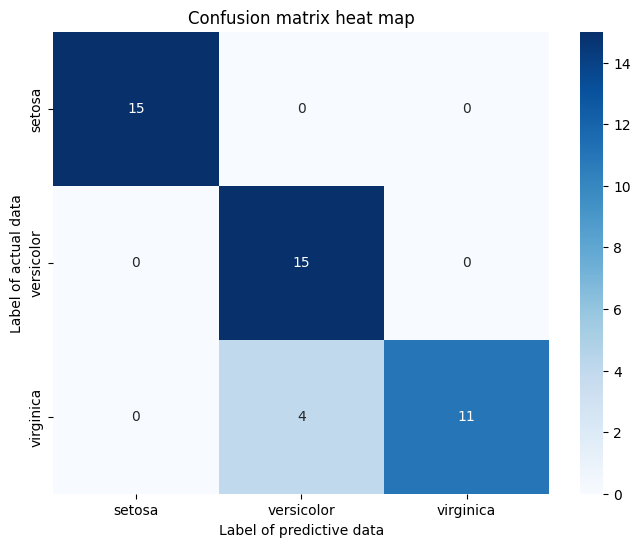

In [17]:

# 6.3 打印混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("\n混淆矩阵:")
print(cm)

# 可视化混淆矩阵
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Label of predictive data')
plt.ylabel('Label of actual data')
plt.title('Confusion matrix heat map')
plt.show()


In [18]:

# 7. 特征重要性分析（KNN不具备直接的特征重要性，但可以通过距离分析间接了解）

# 由于KNN基于特征的距离，我们可以通过观察每个特征对距离的影响来间接了解特征的重要性
# 这里我们简单地查看每个特征的均值和标准差

feature_stats = pd.DataFrame({
    '均值': X.mean(),
    '标准差': X.std()
}, index=feature_names)
print("\n特征统计:")
print(feature_stats)



特征统计:
                       均值       标准差
sepal length (cm)  3.4645  1.973843
sepal width (cm)   3.4645  1.973843
petal length (cm)  3.4645  1.973843
petal width (cm)   3.4645  1.973843


In [20]:

# 8. 超参数调优（选择最优的K值）

# 使用交叉验证选择最优的K值
import numpy as np
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# 找到最佳的K值
optimal_k = k_values[np.argmax(cv_scores)]
print(f"\n最优的K值: {optimal_k}")



最优的K值: 9


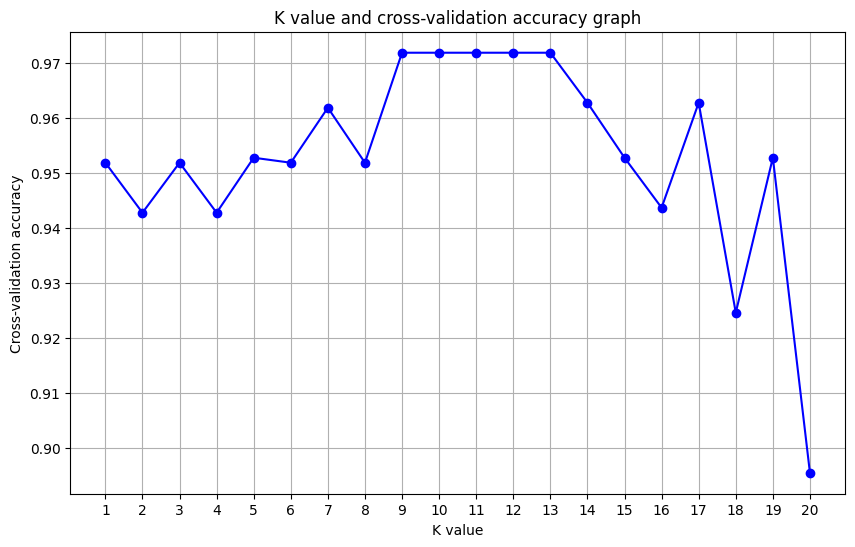

In [22]:

# 绘制K值与交叉验证准确率的关系
plt.figure(figsize=(10,6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('K value')
plt.ylabel ('Cross-validation accuracy')
plt.title ('K value and cross-validation accuracy graph')
plt.xticks(k_values)
plt.grid(True)
plt.show()



使用最优K值后的模型准确率: 0.96

使用最优K值后的分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



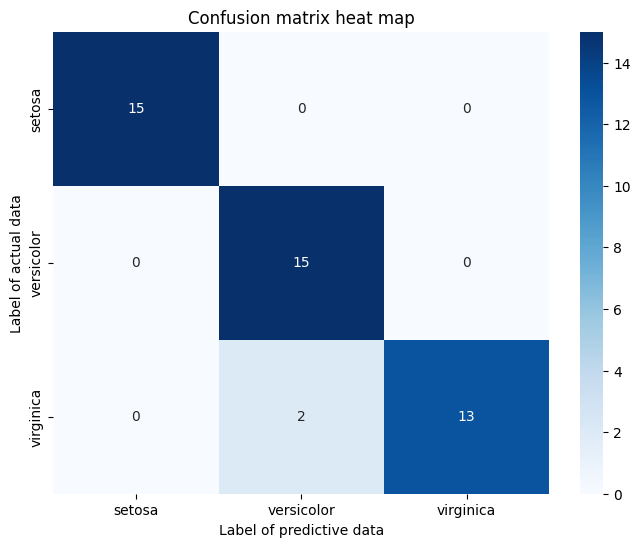

In [24]:

# 使用最优的K值重新训练模型
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_optimal.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# 计算准确率
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"\n使用最优K值后的模型准确率: {accuracy_optimal:.2f}")

# 打印分类报告
print("\n使用最优K值后的分类报告:")
print(classification_report(y_test, y_pred_optimal, target_names=target_names))

# 可视化混淆矩阵
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Label of predictive data')
plt.ylabel('Label of actual data')
plt.title('Confusion matrix heat map')
plt.show()

In [26]:
# 保存标准化器和模型
joblib.dump(scaler, 'knn_scaler.joblib')
joblib.dump(knn, 'knn_model.joblib')

['knn_model.joblib']